In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

In [2]:
# read files
data_dir = 'data'

def read(path):
    return gpd.read_file(path)

grid_fp = f'{data_dir}/TravelTimes_to_5975375_RailwayStation.shp'

# read shapefile data
grid = read(grid_fp)

In [3]:
grid.head()

car_m_d  car_m_t  car_r_d  car_r_t  from_id  pt_m_d  pt_m_t  pt_m_tt  \
0    32297       43    32260       48  5785640   32616     116      147   
1    32508       43    32471       49  5785641   32822     119      145   
2    30133       50    31872       56  5785642   32940     121      146   
3    32690       54    34429       60  5785643   33233     125      150   
4    31872       42    31834       48  5787544   32127     109      126   

   pt_r_d  pt_r_t  pt_r_tt    to_id  walk_d  walk_t  \
0   32616     108      139  5975375   32164     459   
1   32822     111      133  5975375   29547     422   
2   32940     113      133  5975375   29626     423   
3   33233     117      144  5975375   29919     427   
4   32127     101      121  5975375   31674     452   

                                            geometry  
0  POLYGON ((382000.000 6697750.000, 381750.000 6...  
1  POLYGON ((382250.000 6697750.000, 382000.000 6...  
2  POLYGON ((382500.000 6697750.000, 382250.000 6...  
3  POLYGON ((382750.000 6697750.000, 382500.000 6...  
4  POLYGON ((381250.000 6697500.000, 381000.000 6...

In [4]:
print(grid.crs)

epsg:3067


- reproject layer to EPSG 3857 (Web Mercator)
__almost all basemap tiles are projected in web mercator__

In [5]:
data = grid.to_crs(epsg=3857)

In [6]:
print(data.crs)

epsg:3857


In [7]:
data.head()

car_m_d  car_m_t  car_r_d  car_r_t  from_id  pt_m_d  pt_m_t  pt_m_tt  \
0    32297       43    32260       48  5785640   32616     116      147   
1    32508       43    32471       49  5785641   32822     119      145   
2    30133       50    31872       56  5785642   32940     121      146   
3    32690       54    34429       60  5785643   33233     125      150   
4    31872       42    31834       48  5787544   32127     109      126   

   pt_r_d  pt_r_t  pt_r_tt    to_id  walk_d  walk_t  \
0   32616     108      139  5975375   32164     459   
1   32822     111      133  5975375   29547     422   
2   32940     113      133  5975375   29626     423   
3   33233     117      144  5975375   29919     427   
4   32127     101      121  5975375   31674     452   

                                            geometry  
0  POLYGON ((2767221.646 8489079.101, 2766716.966...  
1  POLYGON ((2767726.329 8489095.521, 2767221.646...  
2  POLYGON ((2768231.014 8489111.905, 2767726.329...  
3  POLYGON ((2768735.702 8489128.255, 2768231.014...  
4  POLYGON ((2765724.126 8488524.148, 2765219.488...

- #### adding a default basemap tile to map

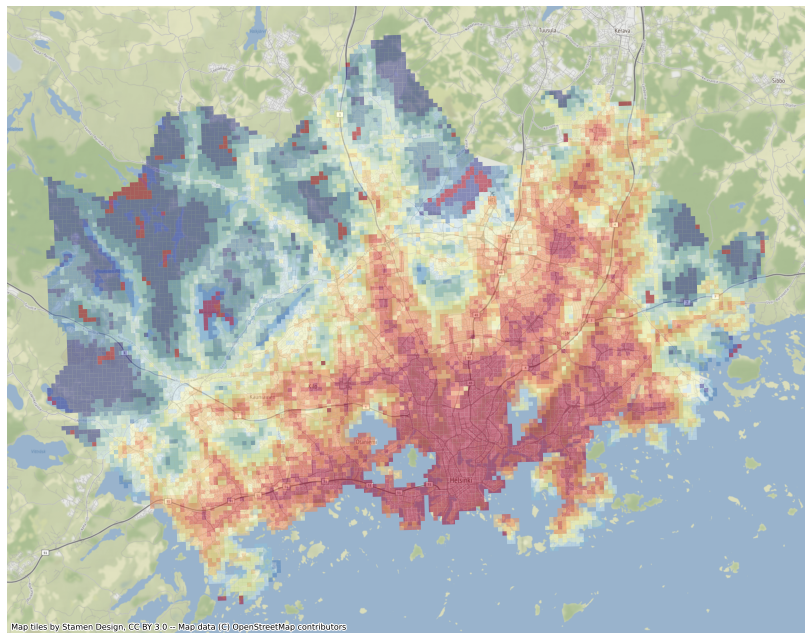

In [13]:
fig, ax = plt.subplots(figsize=(12, 9))

# plot the map
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme='quantiles', k=9, alpha=0.5)

# add basemap
ctx.add_basemap(ax)

ax.axis('off')
plt.tight_layout()

- #### add basemap tile from a specified provider

In [15]:
print(ctx.providers.keys())

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava'])


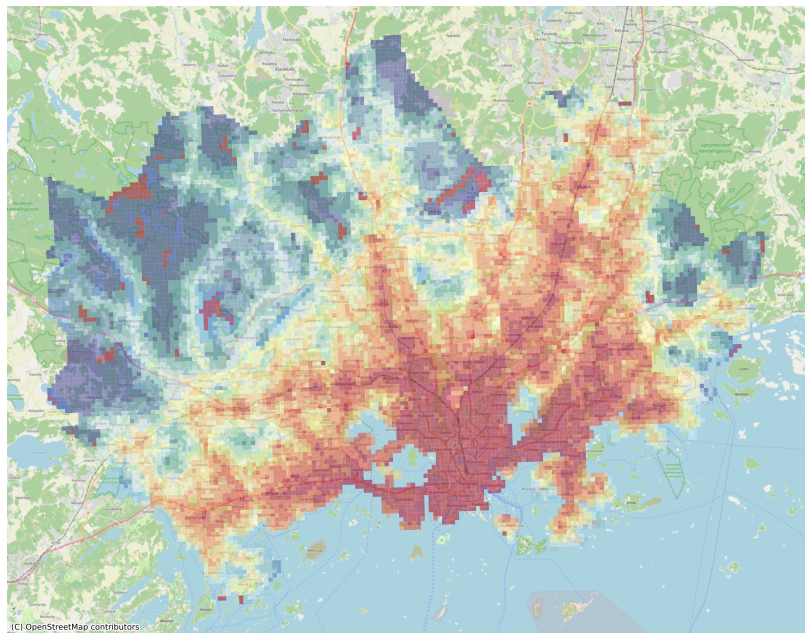

In [16]:
fig, ax = plt.subplots(figsize=(12, 9))

# plot the map
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme='quantiles', k=9, alpha=0.5)

# add basemap from openstreetmap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.axis('off')
plt.tight_layout()

- #### now lets only select a subset of the data

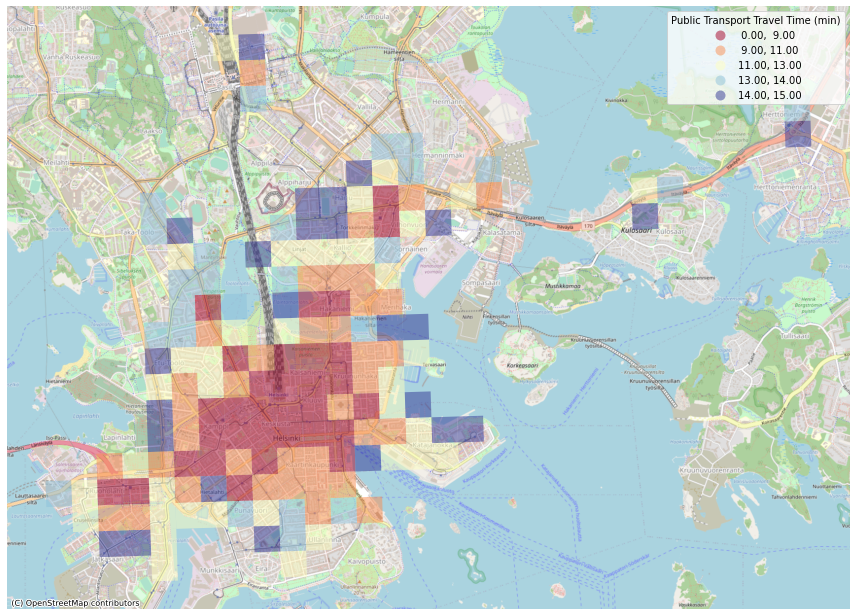

In [22]:
fig, ax = plt.subplots(figsize=(12, 9))

subset = data.loc[(data['pt_r_t']>=0) & (data['pt_r_t']<=15)]

# plot the map
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme='quantiles', alpha=0.5, legend=True)
ax.get_legend().set_title('Public Transport Travel Time (min)')

# add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.axis('off')
plt.tight_layout()

- #### zooming maps to highlight features

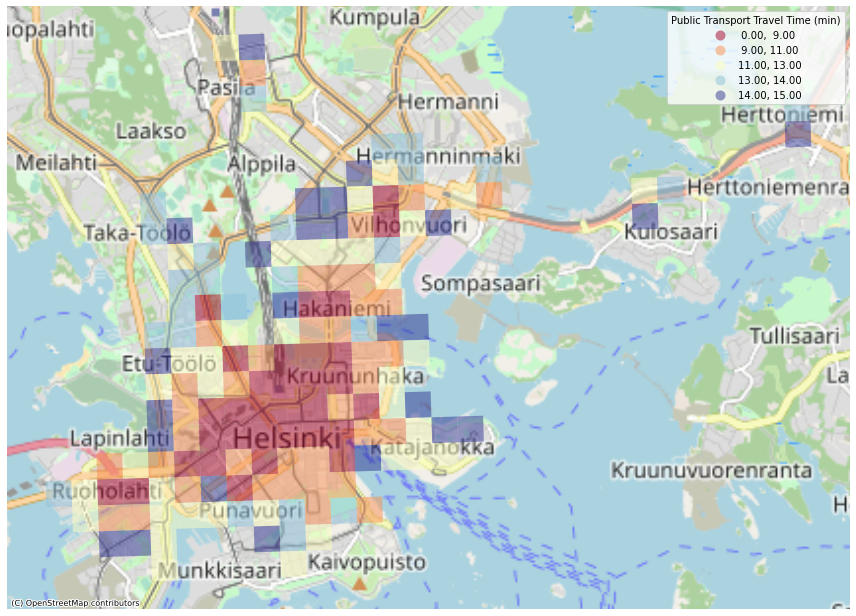

In [25]:
fig, ax = plt.subplots(figsize=(12, 9))

# plot the map
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme='quantiles', alpha=0.5, legend=True)
ax.get_legend().set_title('Public Transport Travel Time (min)')

# add basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)

ax.axis('off')
plt.tight_layout()


- #### crop map and add attribution credits

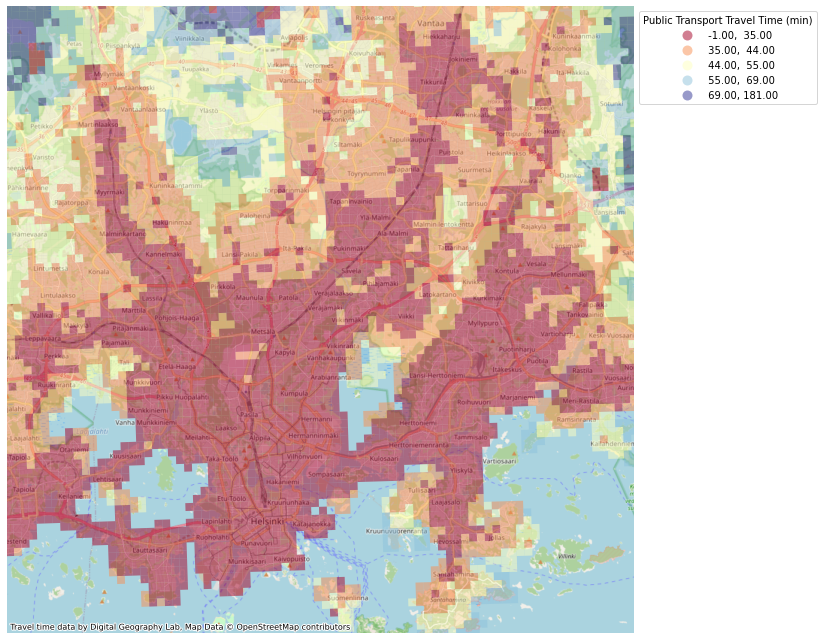

In [29]:
fig, ax = plt.subplots(figsize=(12, 9))

# plot the map
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme='quantiles', alpha=0.5, legend=True)
ax.get_legend().set_title('Public Transport Travel Time (min)')
ax.get_legend().set_bbox_to_anchor((1.3, 1))

# add basemap
credits = "Travel time data by Digital Geography Lab, Map Data © OpenStreetMap contributors"
ctx.add_basemap(ax, attribution=credits, source=ctx.providers.OpenStreetMap.Mapnik)

# crop map
ax.set_xlim(2760000, 2800000)
ax.set_ylim(8430000, 8470000)

ax.axis('off')
plt.tight_layout()

- #### using cartodb basemap service

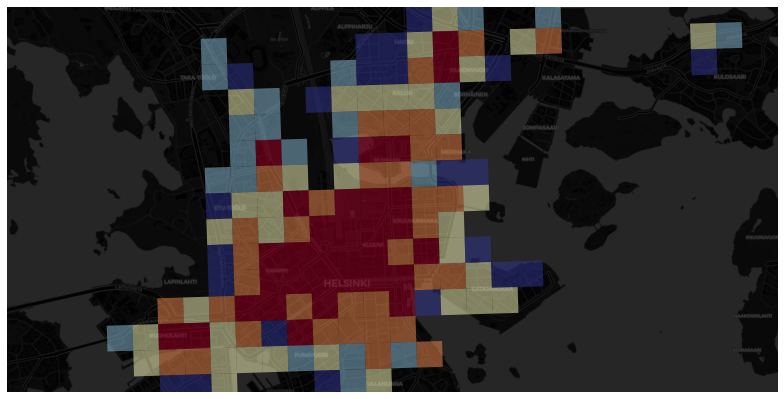

In [30]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(11,8))

# The formatting should follow: 'https://{s}.basemaps.cartocdn.com/{style}/{z}/{x}/{y}{scale}.png'
# Specify the style to use
style = "dark_all"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.5)
    
# Add basemap with `OSM_A` style using zoom level of 14 
ctx.add_basemap(ax, zoom=14, attribution="", source=cartodb_url)

# Crop the figure
ax.set_xlim(2770000, 2785000)
ax.set_ylim(8435000, 8442500)

ax.axis('off')
plt.tight_layout()